# Projeto II -  Titanic

## Sobre o projeto

Este é o segundo projeto do treinamento do programa Nanodegree [Fundamentos de Data Science I da Udacity](https://br.udacity.com/course/python-fundamentos-data-science--nd110).

Trata especificamente sobre a análise de dados, explorando dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.

Você pode ver uma descrição deste conjunto de dados no [site do Kaggle](https://www.kaggle.com/c/titanic/data), de onde os dados foram tirados 

## Etapas do projeto

1. Primeiro será feito um brainstornm para chegar a algumas perguntas;
2. Estas perguntas seram respondidas usando o conjunto do arquivo `titanic-data-6.csv`;
3. Depois de terminar a análise, será criado um relatório que contempla;
    * Uma nota especificando qual foi o conjunto de dados usado
    * Uma definição de qual pergunta
    * Uma descrição do que foi feito para investigar a pergunta
    * Descrição de qualquer limpeza de dados feita
    * Um resumo das estatísticas e gráficos comunicando o resultado final
    * O código usado para criar as análises
4. Dicionário de dados
5. Conclusões
6. Bibliografias


In [1]:
# imports
import pandas as pd
import project_ii_titanic as pj
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.sampledata
%matplotlib inline

In [2]:
# load dos dados (metodo no arquivo .py)
df = pj.load_data_csv('titanic-data-6.csv')

## 1. Avaliando dados

In [3]:
# verificando a imporação dos dados
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# number of samples in each set
print('número de amostras do data frame: {0}'.format(df.shape[0]))

número de amostras do data frame: 891


In [5]:
# number of columns in each set
print('número de colunas do data frame: {0}'.format(df.shape[1]))

número de colunas do data frame: 12


In [6]:
# duplicate line in eache set
print('linhas duplicadas em data frame: {0}'.format(df.duplicated().sum()))

linhas duplicadas em data frame: 0


In [7]:
# tipos das colunas
pj.check_types(df)

coluna: PassengerId, tipo: <class 'numpy.int64'>
coluna: Survived, tipo: <class 'numpy.int64'>
coluna: Pclass, tipo: <class 'numpy.int64'>
coluna: Name, tipo: <class 'str'>
coluna: Sex, tipo: <class 'str'>
coluna: Age, tipo: <class 'numpy.float64'>
coluna: SibSp, tipo: <class 'numpy.int64'>
coluna: Parch, tipo: <class 'numpy.int64'>
coluna: Ticket, tipo: <class 'str'>
coluna: Fare, tipo: <class 'numpy.float64'>
coluna: Cabin, tipo: <class 'float'>
coluna: Embarked, tipo: <class 'str'>


In [8]:
# verificar valores ausentes
pj.valores_ausentes(df)

Colunas apresentam valores nulos, seguem abaixo:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observações: alguns dados apresentam valores ausentes como: idade (Age), cabine (Cabin) e o local de embarque (Embarked) 

In [9]:
# verificanco os valores ausentes em Embarked
df.loc[df['Embarked'].isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# série com o número de observações distintas sobre as váriáveis solicitadas
display(pj.valores_distintos(df))

Número de observações distintas no data frame:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64, 
***Total*** 2970


None

### 1.1 brainstornm para chegar a algumas perguntas
Alguns pontos:
* é preciso realizar alguma limpeza nos dados?
* em qual porto de embarque houve maior número de pais e filho embarcando?
* qual o percentual de sobreviventes e de qual categoria eles eram?

## 2. Limpeza no data frame
* substituir espaços por sublinhados e colocar tudo em letra minúscula
* utilizando média para preencher valores ausentes em "Age"
* retirando colunas que não serão ultilizados 
* renomeando a primeira linhas do data frame

### 2.1. Renomear colunas

In [11]:
display(pj.renomeando_colunas(df).head(3))

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2.2. Preenchendo valores ausentes em "age"

In [12]:
# Utilizando médias para preencher valores ausentes em Age
df['age'].fillna(df['age'].mean(), inplace=True)

# confirmando a correção
pj.valores_ausentes(df)

Colunas apresentam valores nulos, seguem abaixo:


passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

### 2.3 Retirando colunas que não serão ultilizados

In [13]:
# retirando a coluna "ticket"
df.drop(['ticket'], axis=1, inplace=True)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [14]:
# antes era 12 colunas agora passa a ser 11
df.shape

(891, 11)

### 2.4 Renomeando a primeira linhas do data frame


In [15]:
# renomeando a primeira linha (nome das colunas)
df.columns = ['passageiro_id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 
                      'irmaos_conjuge', 'pais_criancas','tarifa','cabine','porto_embarque']
df.head()

,passageiro_id,sobrevivente,classe,nome,sexo,idade,irmaos_conjuge,pais_criancas,tarifa,cabine,porto_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [16]:
# salvando as alterações
df.to_csv('titanic_data_editado', index=False)

## 3. Respondendo as perguntas

In [17]:
df = pj.load_data_csv('titanic_data_editado')

* uso de funções para evitar repetições

In [18]:
def plot_grafico_facegrid(df, str_row_i, str_col_j, str_variavel_eixo_x):
    """
    gera gráficos do tipo FaceGride, utilizando a biblioteca seaborn.
    :param df: data frame para análise
    :param str_row_i: string coluna do df que será utilizada como linhas do gráfico
    :param str_col_j: string coluna do df que será utilizada como coluna do gráfico
    :param str_variavel_eixo_x: string coluna do df que será utilizada como eixo do x do gráfico
    :return: gráficos do estilo facegrid
    """
    s = sns.FacetGrid(df, row=str_row_i, col=str_col_j, margin_titles=True)
    bins = np.linspace(np.min(df[str_variavel_eixo_x]), np.max(df[str_variavel_eixo_x]), 13)
    s.map(plt.hist, str_variavel_eixo_x, color="steelblue", bins=bins)
    

In [19]:
def plot_grafico_kind(df_filtro, str_kind, str_x_label, str_y_label, str_title):
    """
    gera gráficos do tipo um tipo determinado por parâmetro.
    :param df_filtro: dados selecionados para criação do gráfico
    :param str_kind: string que informa o tipo do gráfico
    :param str_x_label: string que é o label do eixo x
    :param str_y_label: string que é o label do eixo y
    :param str_title: string que é o título do gráfico x
    :return: gráfico do tipo do parâmetro str_kind
    """
    df_filtro.plot(kind=str_kind, bins=12, figsize=(7,7), color='steelblue', alpha= 1, grid=False, 
                  title=str_title, y=str_y_label, legend=True)
    plt.xlabel(str_x_label)
    plt.ylabel(str_y_label)

* análise gráfica (geral)

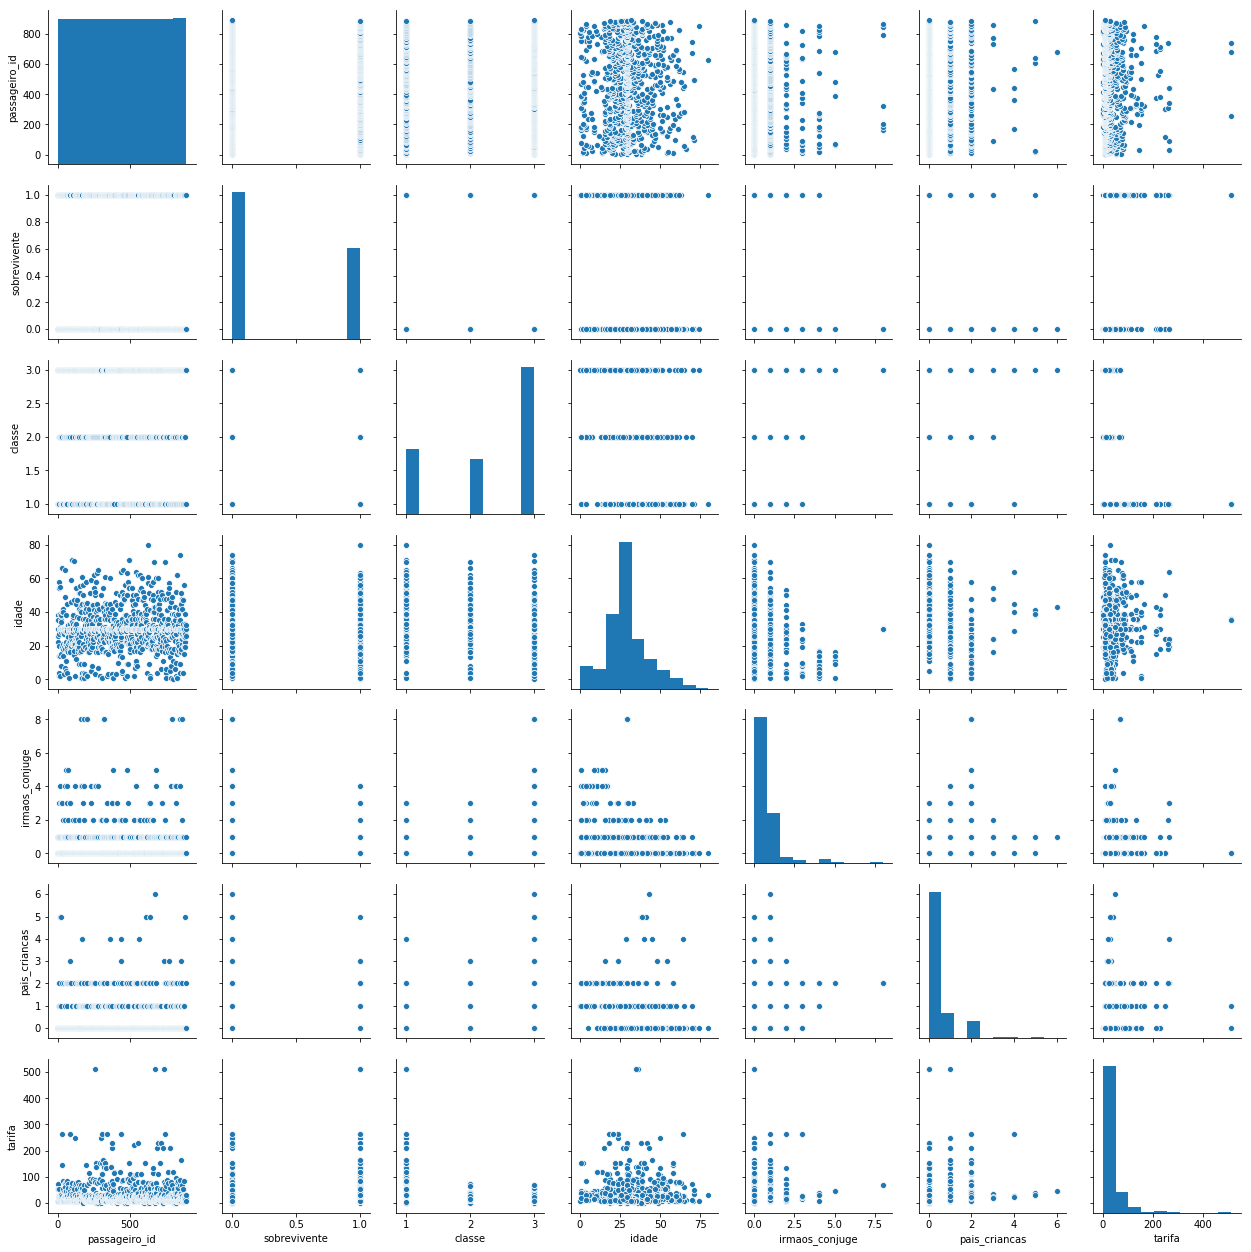

In [20]:
# g = sns.pairplot(df, vars=["sobrevivente", "idade"], height=5,dropna=True)
display(sns.pairplot(df, dropna=True))

Este conjuntode gráfico ajuda a ter uma visão geral de qual perguntas podem ser feitas sobre este dataset, algumas perguntas levantadas:
* Qual a idade média, mínima e a máxima dos passageiros abordo?
* Em qual porto houve maior frquência no embarque de passageiros?
* Qual a faixa de idade desta pessoas que embarcaram neste porto? 
* Esta maioria estava acompanhada de algum membro a qual possuiam relação familiar, como mãe, filhos, etc?
* Qual a localização no návio dos sobreviventes?

### 3.1 Qual a idade média, mínima e a máxima dos passageiros abordo?

In [21]:
df_mean = df.describe()
display(df_mean)
print("Idade média dos passageiros: {0}\nNúmero de soreviventes: {1}".format(
    df_mean['idade']['mean'], df_mean['sobrevivente']['count']))
age_min = np.nanmin(df['idade'].values)
age_max = np.nanmax(df['idade'].values)
print('Idade min: {0}\nIdade max: {1}'.format(age_min, age_max))

,passageiro_id,sobrevivente,classe,idade,irmaos_conjuge,pais_criancas,tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Idade média dos passageiros: 29.699117647058763
Número de soreviventes: 891.0
Idade min: 0.42
Idade max: 80.0


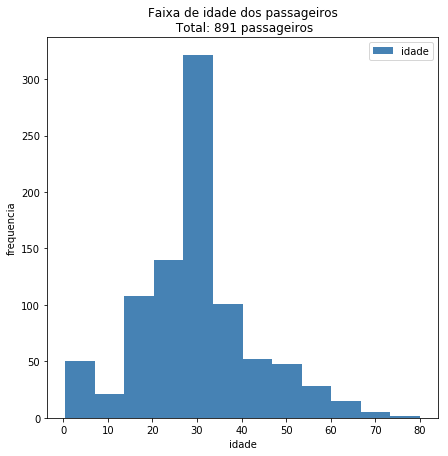

In [22]:
# Plot a simple histogram with binsize determined automatically
filtro = df[df['idade'] > 0.0]['idade']
titulo = 'Faixa de idade dos passageiros\n Total: {0} passageiros'.format(df.shape[0])
plot_grafico_kind(df_filtro=filtro, str_x_label="idade",str_kind="hist", str_y_label="frequencia", str_title=titulo)


Idade média dos passageiros, aproximada, é de 29.7 anos, tendo como mínima e máxima 0.42 e 80.0, respectivamente.

### 3.2 Em qual porto houve maior frquência no embarque de passageiros? Qual a faixa de idade? Esta maioria estava acompanhada de algum membro a qual possuiam relação familiar, como mãe, filhos, etc?

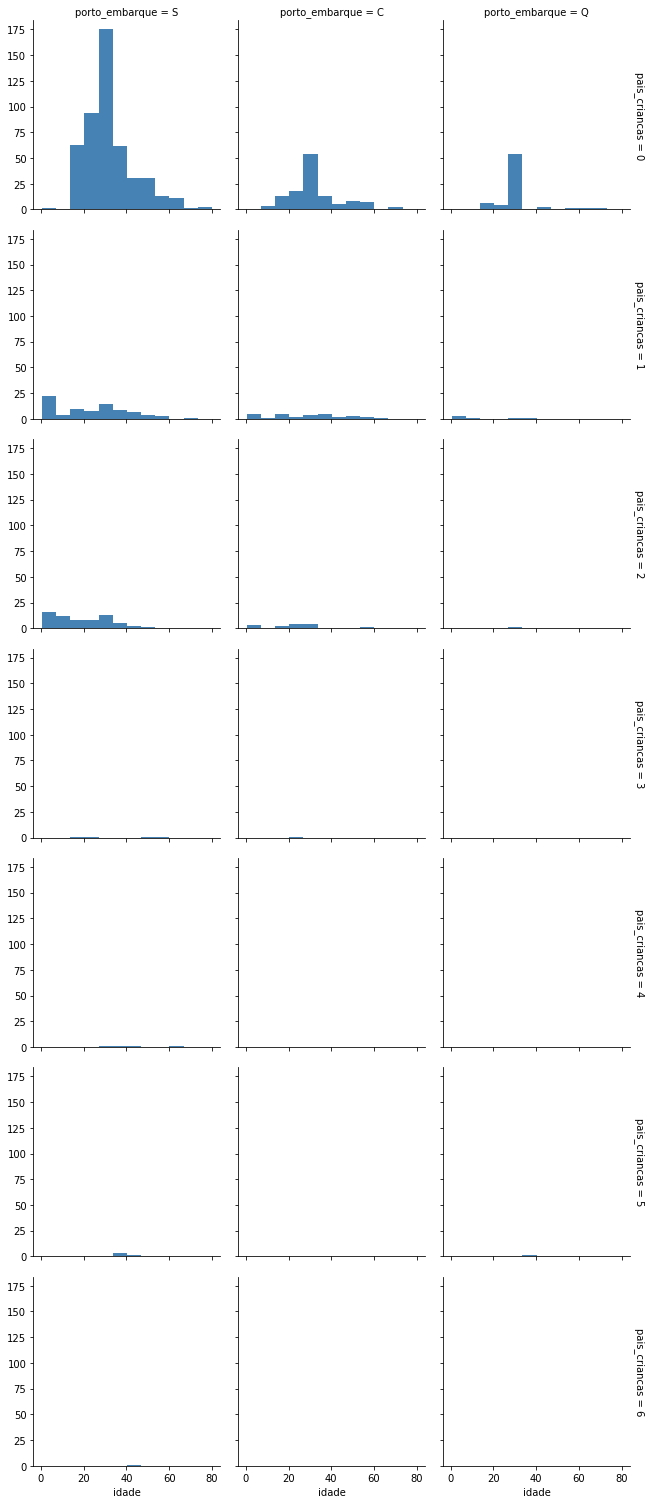

In [23]:
# analisando três variáveis
plot_grafico_facegrid(df=df, str_row_i="pais_criancas", str_col_j="porto_embarque", str_variavel_eixo_x="idade")

In [24]:
# embarque em S (Southampton) por pessoas sem relacionamento familiar como pais e filhos.
pais_criancas_S_0 = df[['idade', 'pais_criancas', 'porto_embarque']].query("porto_embarque=='S' and pais_criancas==0").describe()
pais_criancas_S_0

,idade,pais_criancas
count,484.000000,484.0
mean,31.662465,0.0
std,11.149368,0.0
min,5.000000,0.0
25%,24.000000,0.0
50%,29.699118,0.0
75%,36.000000,0.0
max,80.000000,0.0


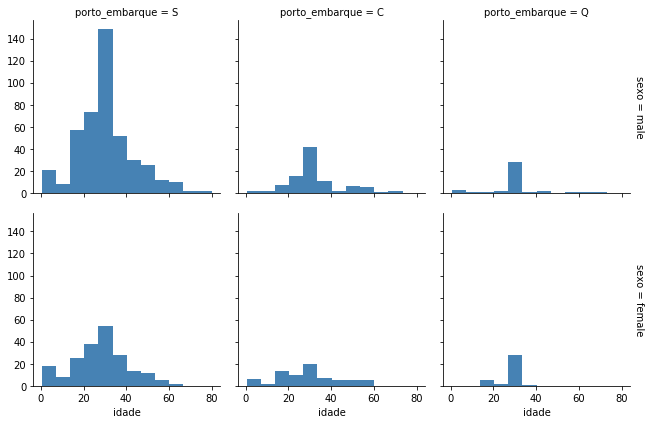

In [25]:
# embarque em S (Southampton) por pessoas sem relacionamento familiar como pais e filhos.
embarque_sexo = df[['idade', 'sexo', 'porto_embarque']]
#embarque_sexo
plot_grafico_facegrid(df=df, str_row_i="sexo", str_col_j="porto_embarque", str_variavel_eixo_x="idade")

In [26]:
# embarque sexo masculino no porto S (Southampton)
emb_mas = embarque_sexo.query("sexo=='male' and porto_embarque=='S'").describe()
emb_mas

,idade
count,441.000000
mean,30.193391
std,13.071290
min,0.670000
25%,22.000000
50%,29.699118
75%,36.000000
max,80.000000


In [27]:
# embarque sexo feminino no porto S (Southampton)
emb_fem = embarque_sexo.query("sexo=='female' and porto_embarque =='S'").describe()
emb_fem

,idade
count,203.000000
mean,27.932931
std,13.112879
min,1.000000
25%,20.500000
50%,29.000000
75%,35.000000
max,63.000000


In [28]:
# percentual de embarque no porto S (Southampton)
perc_emb_porto_fem_S = ((embarque_sexo.query("sexo=='female' and porto_embarque =='S'").count()[1])/df.shape[0])*100
print("Percentual embarque sexo feminino em Southampton: {:.2f}".format(perc_emb_porto_fem_S))

perc_emb_porto_fem_S = ((embarque_sexo.query("sexo=='male' and porto_embarque =='S'").count()[1])/df.shape[0])*100
print("Percentual embarque sexo masculino em Southampton: {:.2f}".format(perc_emb_porto_fem_S))

Percentual embarque sexo feminino em Southampton: 22.78
Percentual embarque sexo masculino em Southampton: 49.49


Maior frequência de embarque foi  no porto de S (Southampton - maior cidade portuária da costa sul do Reino Unido), sendo 49.49% do sexo masculino e 22.78 do sexo feminino, um total de mais de 60% dos embarcados. Estes passageiros não possuiam membros a qual tinham relações familiares, por exemplo, pais, mães ou crianças como filhos, filhas, enteados etc.). A idade média era de 31.66 anos. Vale resaltar que a idade mínima foi de 5 anos, porem esta criança viajava apenas com uma babá, portanto foi considerada neste grupo.

### 3.1 Em qual local do návio havia maior frequência de passageiros? Em classe houve maior número sobreviventes?

Text(0,0.5,'número de passageiros')

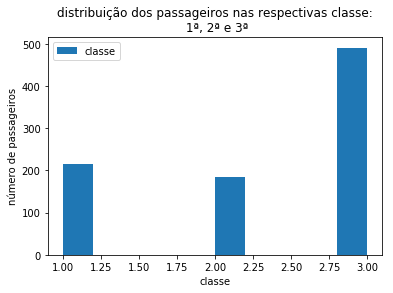

In [29]:
# dsitribuição dos passageiros no návio
df[['idade', 'classe']].plot(kind='hist', y='classe', title='distribuição dos passageiros nas respectivas classe:\n 1ª, 2ª e 3ª')
plt.xlabel('classe')
plt.ylabel('número de passageiros')

Maioria dos passageiros estavam na terceira classe

In [30]:
sobrevivente_classe = df[['passageiro_id', 'classe', 'sobrevivente']].groupby(['sobrevivente', 'classe'])
sobrevivente_classe.describe()

passageiro_id                                        \
                            count        mean         std   min     25%   
sobrevivente classe                                                       
0            1               80.0  410.300000  252.655587   7.0  174.00   
             2               97.0  452.123711  257.771065  21.0  229.00   
             3              372.0  453.580645  263.090509   1.0  206.75   
1            1              136.0  491.772059  239.006988   2.0  307.75   
             2               87.0  439.080460  244.211937  10.0  254.00   
             3              119.0  394.058824  264.680245   3.0  169.50   

                                           
                       50%     75%    max  
sobrevivente classe                        
0            1       437.0  608.75  873.0  
             2       414.0  686.00  887.0  
             3       470.0  679.50  891.0  
1            1       510.5  693.50  890.0  
             2       441.0  612.50  881.0  
             3       359.0  633.50  876.0

In [31]:
(sobrevivente_classe["classe"].count()/df.shape[0])*100


sobrevivente  classe
0             1          8.978676
              2         10.886644
              3         41.750842
1             1         15.263749
              2          9.764310
              3         13.355780
Name: classe, dtype: float64

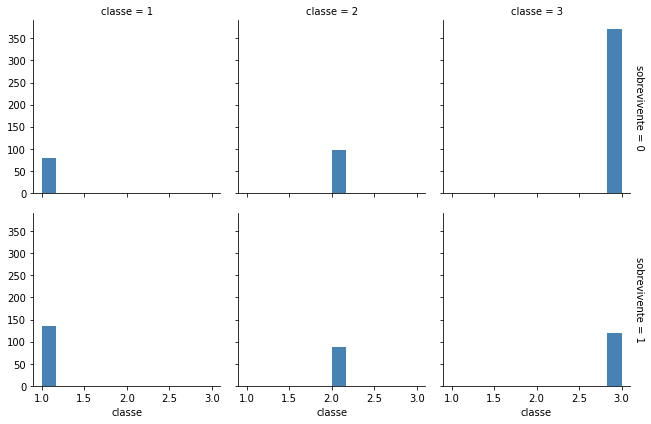

In [32]:
# visualização dos sobreviventes por classe
plot_grafico_facegrid(df=df, str_row_i="sobrevivente", str_col_j="classe", str_variavel_eixo_x="classe")

Text(0.5,0.98,'Passageiros sobreviventes por classe')

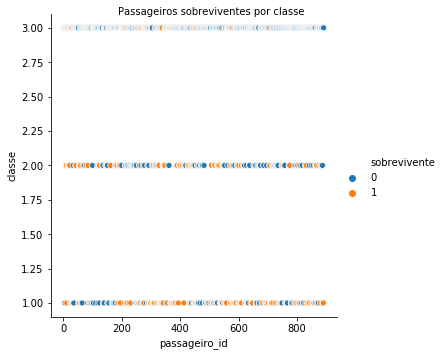

In [33]:
# outra visualização dos sobreviventes por classe
lm = sns.relplot(x="passageiro_id", y="classe", hue="sobrevivente", data=df)
fig = lm.fig
fig.suptitle("Passageiros sobreviventes por classe", fontsize=10)

Podemos destacar que em média sobreviveu mais passageiros da primeira classe.

## 4. Dicionário de dados:
* sobrevivente: Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim
* Classe**: Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe
* nome: Nome do passageiro
* sexo: Sexo do passageiro
* idade: Idade do passageiro. A idade é fracionária se menor que 1. Se a idade é estimada, é na forma de xx.5
* irmaos_conjuge: Informa a quantidade de irmãos e cônjuges que possuía na embarcação
* pais_criancas: relacionamento familiar dos passageiros como filhos, filhas. Algumas crianças viajaram apenas com uma babá, portanto o valo é 0 para elas.
* tarifa: Preço da passagem
* embarque: Local onde o passageiro embarcou. C = Cherbourg, Q = Queenstown, S = Southampton
* cabine: cabine acomodação do passageiro

## 5. Conclusões
De acordo com o conjunto de dados fornecido ```titanic-data-6.csv```podemos constatar que havia abordo do Titanic 891 pessoas, porem como registros históricos o transatlântico afundou na sua viagem inaugural com 2228 passageiros, dos quais 1523 morreram. Portanto, as conclusões não são definitivas. O maior grupo de embarque ocorreu no porto de Southampton (mais de 60% dos passageiros), que é a maior cidade portuária da costa sul do Reino Unido, o perfil destas pessoas possuiam idade média de 31.66 anos, tendo sua máxima e mínima entre 5 e 80 anos, respectivamente. Os passageiros não possuiam membros a qual tinham relações familiares, por exemplo, pais, mães ou crianças como filhos, filhas, enteados etc.), uma observação sendo a idade mínima de 5 anos, porem esta criança viajava apenas com uma babá, portanto foi considerada neste grupo. Para finalizar podemos destacar, que em média, sobreviveu ao desastre um maior número de passageiros da primeira classe, sendo que maioria dos passageiros viajavam na terceira classe.

### 5.1 Limitações
Algumas propriedades apresentaram dados faltes, podemos citar a idade (age), neste caso precisamos fazer uma média para preencher os dados faltantes. Outro dados faltes foi cabines (cabin) do návio e embarques (embarked), porem nestes casos optou-se por não altera-los.

## 6. Bibliografias

1. https://pt.wikipedia.org/wiki/Southampton, visita em 11/10/2018
2. https://pt.wikipedia.org/wiki/Southampton, visita em 11/10/2018
3. https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm, visita em 09/10/2018
3. https://aventurasnahistoria.uol.com.br/noticias/reportagem/13-mitos-e-fatos-do-naufragio-do-titanic.phtml, visita em 07/10/2018
4. http://g1.globo.com/mundo/noticia/2012/01/veja-os-principais-naufragios-dos-ultimos-cem-anos.html, visitado em 11/10/2018